<a href="https://colab.research.google.com/github/magesh73/project1/blob/master/EVA_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

**Problem Statement:** Below is DNN algorithm to identify numerical images 0..10 and catigorize them according, the algorithm has glitchs that needs to be identified.

**Install Keras**

In [0]:

# https://keras.io/
!pip install -q keras
import keras

**Prerequistes**

Keras Models

Keras Layers(Covolution2D and Flatten)

Keras Utils

Dataset -Mnist

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Import **trainning** and **test** data from mnist dataset 

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check out the  size/dimension of the train data and using matplotlib library show  image of mnist data

Size of the image is **28x28** and we have **60000** samples in training dataset

(60000, 28, 28)


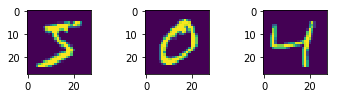

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
for index in range(3):
  #define subplot
  plt.subplot(330 + 1 + index)
  #plot 
  plt.imshow(X_train[index])
plt.show()

Reshape the dataset to have single color channel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Currently the pixels as a value between 0-255 unsigned integers, 0 represents bright black color and 255 represents bright white color.

For the Model, Normalize/Rescale the pixels values so that they have float values between [0,1]

In [0]:
#Converting integer to float value
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Values rescaled to fall between [0,1]
X_train /= 255
X_test /= 255

y_train is one dimensional array which has 60000 data samples

In [0]:
y_train[:10]
print(y_train.shape)

(60000,)


As we have 10 catgories [0,1,2,3,4,5,6,7,8,9] of numerical values, we have to classify the images into those categories, the catgories has to be converted into binary values 

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Execute below cell to see the output of category representation in binary value

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
#Input channel 32
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#Input channel 64
#Global Receptive field 5
model.add(Convolution2D(64, 3, 3, activation='relu'))
#Input channel 128
#Global Receptive field 7
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#Input channel 256
#Global Receptive field 9
model.add(Convolution2D(256, 3, 3, activation='relu'))
#Input channel 512
#Global Receptive field 11
model.add(Convolution2D(512, 3, 3, activation='relu'))
#Input channel 1024
#Global Receptive field 13
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#Input channel  2048
#Global Receptive field 15
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#Input channel 10
#Global Receptive field 17
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [0]:
from keras.layers import Activation, MaxPooling2D
from keras.layers import Dense

model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
23008/60000 [==========>...................] - ETA: 1:22:01 - loss: 14.5087 - acc: 0.0977

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.05815092300456736, 0.987]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.98473961e-12 6.17699200e-15 1.13075369e-12 2.34764208e-10
  1.12143478e-15 5.46381313e-15 1.73773702e-19 1.00000000e+00
  2.06114271e-12 1.18310806e-10]
 [2.99216421e-15 1.22033106e-10 1.00000000e+00 7.20199250e-15
  8.06395179e-20 2.24378137e-23 5.75024943e-18 9.92448453e-17
  4.74801883e-16 1.10822052e-17]
 [5.48156301e-13 9.99999881e-01 1.14312769e-11 1.24563090e-16
  6.66377531e-08 5.47926064e-14 5.59705683e-14 2.29220154e-09
  5.26823333e-12 1.44701674e-13]
 [1.00000000e+00 7.07125602e-14 6.97996825e-12 1.30143368e-14
  7.96424931e-15 1.34024641e-13 1.48142384e-11 2.31121988e-09
  6.96624225e-12 5.37044520e-10]
 [1.51692027e-13 3.60629658e-13 6.29315003e-12 8.01897272e-14
  9.99999762e-01 9.91385034e-13 2.58725655e-14 1.79692305e-09
  2.33504799e-10 2.88848724e-07]
 [5.31802080e-14 1.00000000e+00 5.48802106e-12 7.47486591e-17
  2.67876554e-10 7.23303850e-18 4.35963060e-19 9.64142277e-09
  8.39683618e-12 3.89883351e-12]
 [4.97652404e-17 9.96331107e-09 4.90022856e-10 1.03960625e

The usage of the model results in huge parmeters size **25 million**, that is going to be  time consuming operation, and burden on GPU , may be model is using high number of channels and also multiple level of convolution is causing generation of parameters. **bold text**